# MegaTrond
## Et datainsamlings prosjekt, Teknologi og forskningslære H23

Laget av: Elias, Hedda og Aksel

# Oppgave
Bruk arduino og sensorer for å gjøre undersøkelser og samle inn data. Dataene skal lagres til fil og bearbeides for så å presenteres på en oversiktlig måte.

Resultatet skal presenteres i en skriftlig rapport der problemstillingen og prosessen beskrives, og målingene vises og drøftes. I tillegg skal prosjektet presenteres i en kort presentasjon for klassen.

# Problemstilling
Hvilket klasserom har best læringsmiljø? Finnes det noe korrelasjon mellom hvilke fag som var i et klasserom og hvordan miljøet i klasserommet er?

# Introduksjon
I dette prosjektet har vi valgt å samle miljø-data fra utvalgte klasserom og deretter bruke denne dataen til å finne ut hvilket klasserom som har best læringsmiljø. Vi vil også se hvordan hvilke fag som er i ett klasserom påvirker læringsmiljøet. For å gjøre dette har vi samlet div data med en Arduino Uno og brukt en Raspberry Pi 2B+ for å lagre dataen. Vi valgte å ta i bruk Raspberry Pien for å forenkle logge prossesen og slippe å ha en laptop stående med RPien til alle tider.

Dette prosjektet består av fire hoveddeler
## Innholdsfortegnelse
1. [Introduksjon](#Introduksjon)
2. [Innsamling av data](#Innsamling-av-data)
    1. [Logging av data](#Logging-av-data-med-Arduino)
    2. [Lagring av data](#Lagring-av-data-med-RPi)
3. [Resultater](#Resultater)
    1. [Visualisering](#visualisering)
    2. [Sentraltendens og Spredning](#sentraltendens-og-spredning)
    3. [Korrelasjon](#korrelasjon)
4. [Drøfting](#drøfting)
    1. [Visualisering](#visualisering-av-data)
    2. [Korrelasjoner](#korrelasjoner)

# Innsamling av data
Innsamling av data er sentralt i dette prosjektet. Vi brukte mye tid på å bestemme hvilke sensorer og metoder vi skulle benytte for å samle inn data. Vi valgte bruke en BME680 som den sentrale sensoren i prosjektet, denne sensoren kan samle inn trykk, temperatur, luftfuktighet og gass. Vi hadde også med en fotoresisitor og en lydmåler.

# Logging av data med Arduino
Som nevnt bruker vi en Arduino for å samle dataen fra sensorene og aggregere den. For å redusere mengden feilkilder så gjør vi lite prossesering av dataen på arduinoen og vi valgte heller å sende rå data videre så vi kan prossesere den i etterkant. Vi har et ganske enkelt program for å samle inn data. Mesteparten av dataen kommer fra BME680 sensoren som kommuniserer og protokollen I2C. Denne protokollen gjør det veldig lett å samle inn data fra den sensoren. Etter at dataen er hentet fra sensorene skrives det til RPien over serial. Vi skriver det til serial i CSV format for å gjøre det lett å håndtere senere. Arduino programmet kan sees [her](https://github.com/EliasTors/MegaTrond/blob/main/MegaTrond-Data-collector/MegaTrond-Data-collector.ino) eller så kan det sees under:


```C++
#include <Wire.h>
#include <Adafruit_Sensor.h>
#include <Adafruit_BME680.h>
int lyd = A0;
int lys = A1;
Adafruit_BME680 bme; // create BME680 object

void setup() {
    pinMode(lyd,INPUT);
    pinMode(lys, INPUT);
    Serial.begin(600);
    while (!Serial); // wait for serial port to connect
    if (!bme.begin(0x76)) {
        Serial.println(F("Could not find a valid BME680 sensor, check wiring!!"));
        while (1);
    }
    Serial.println("Temp,Pressure, humidity, gas, lyd, lys");
}

void loop() {
    int lydniva = analogRead(lyd);
    int lysniva = analogRead(lys);
    if (! bme.performReading()) {
        Serial.println("Failed to perform reading :(");
        return;
    }

    Serial.print(bme.temperature);
    Serial.print(",");
    Serial.print(bme.pressure / 100.0);
    Serial.print(",");
    Serial.print(bme.humidity);
    Serial.print(",");
    Serial.print(bme.gas_resistance / 1000.0);
    Serial.print(",");
    Serial.print(lydniva);
    Serial.print(",");
    Serial.print(lysniva);
    Serial.println();

    delay(1000);
}
```

# Lagring av data med RPi
Som nevnt i introduksjonen så brukte vi en RPi for å lagre dataen etter at Arduinoen hadde samlet de. Vi valgte å bruke en RPi fordi det er enkeltstående, robust og godt dokumentert. Vi startet med å bruke en RPi Zero 2 der vi skrev dataen direkte til en CSV fil, men vi støttet på problemer med overoppheting etter kort tid. Vi valgte derfor å gå over til å bruke den litt mer robuste Raspberry Pi 2B+. Vi byttet også metoden vår for lagring til SQL lite for å redusere hvor tungt Pien måtte jobbe med prossesen. Etter disse endringene støttet vi ikke på flere problemer. Vi valgte å benytte Rasbian OS lite etter som vi ikke har behov for en GUI og det gjorde det lettere å få Pien stabil. Koden som kjører på RPien kan sees [her]() eller nedenfor. Den er designet for å beholde data selv om Pien plutselig mister strøm. Vi aktiverer den ved å koble til Pien med SSH også bare kjøre det som et annet python program. Det eneste man trenger å installere i tillegg til standard python er biblioteket `pyserial` ettersom det er dette vi bruker for å samle data fra arduinoen over USB serial.
```python


```

# Resultater
Vi fikk mange resultater i de forskjellige rommene og har valgt a visualisere dem ved hjelp av grafer og korrelasjonsmatriser med hensikten å se sammenhenger mellom forskjellige datapunkter og for å se ulikheter i de forskjellige rommene. 

## Visualisering
Vi har valgt hovedsakelig vanlige grafer som vår visualiseringsmetode fordi dette er mest oversiktlig for den type data vi har. Vi kan puttet også to rom på samme graf som gjør at du kan lett se forskjeller i for eksempel temperatur.

c:\Users\Aksel\OneDrive - Viken fylkeskommune\Tekfors\MegaTrond\plotter.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_room = data_room.set_index('time').resample(interval).mean().reset_index()


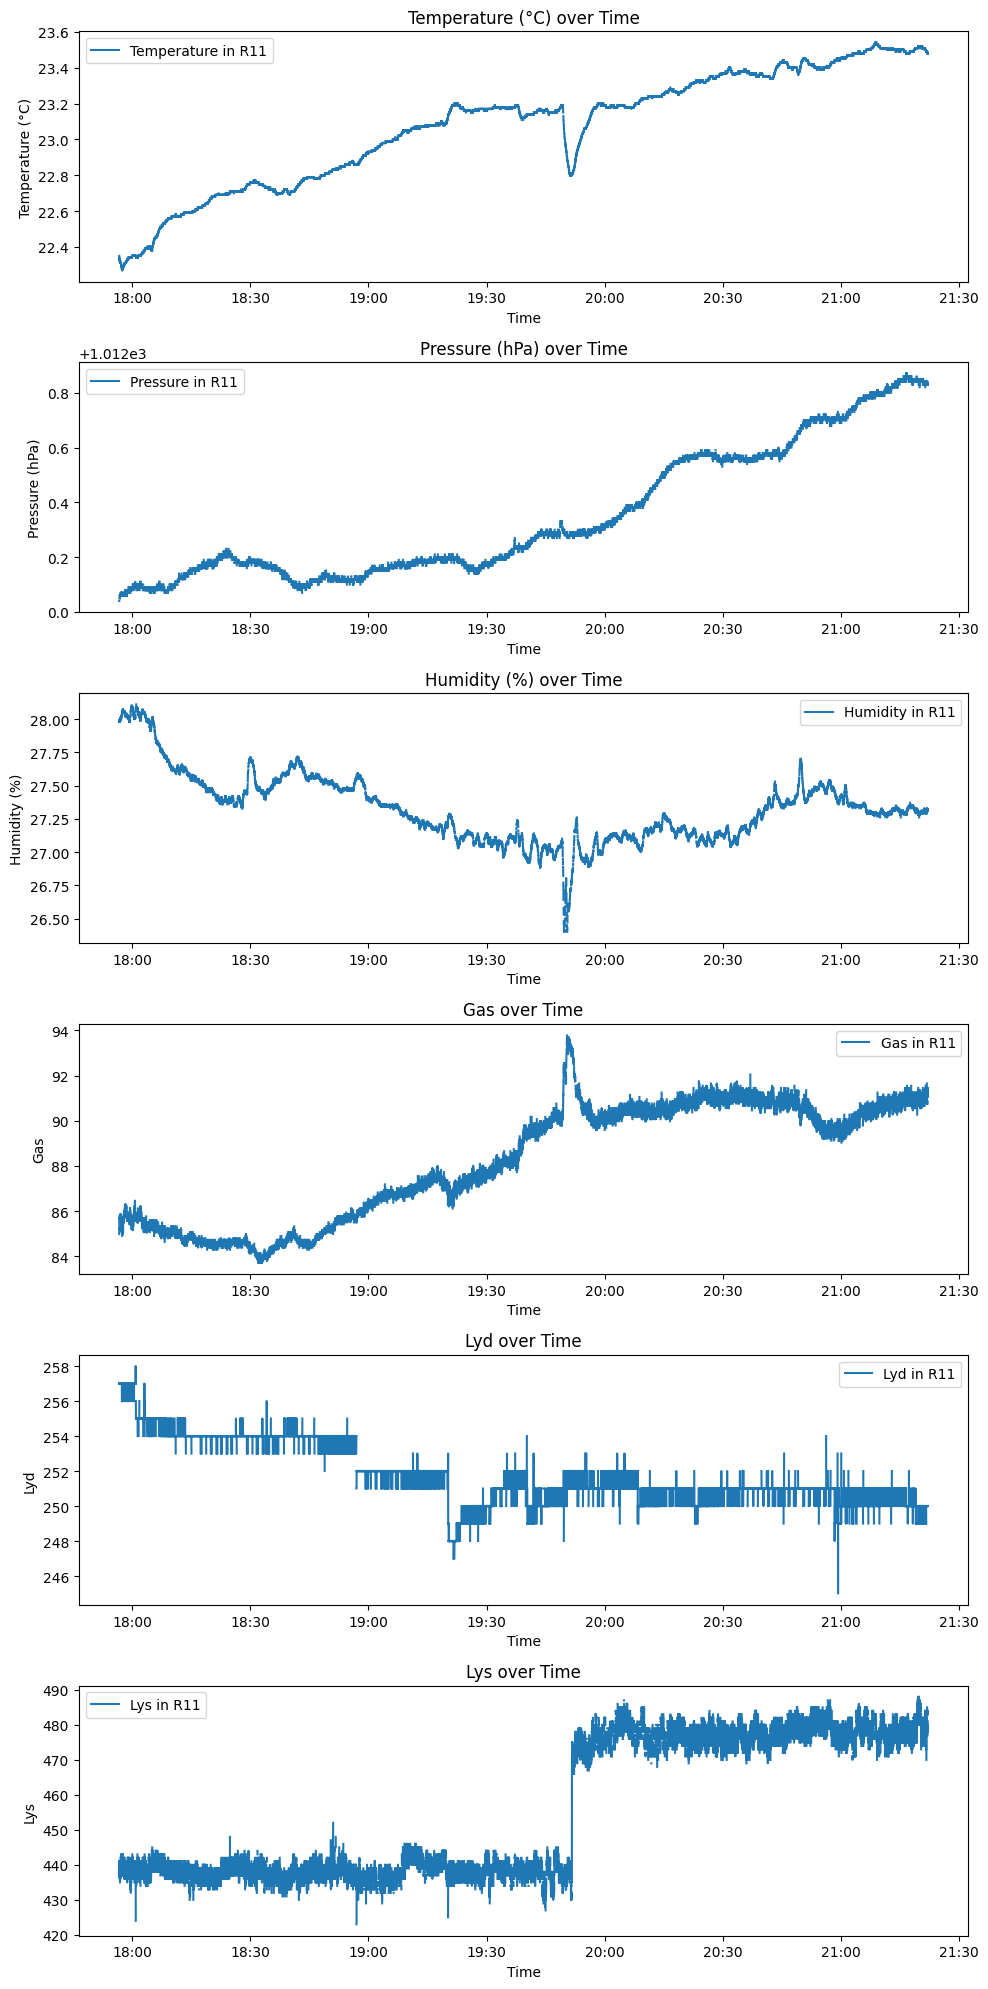

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from plotter import plotter
p = plotter()


p.plot_data('test.csv', '1S')


# Drøfting 
Feilkilder:

Feilkildene som kan oppstå går hovedsakelig ut på sensorene; kvaliteten, plasseringen og stabiliteten, samt feil i koden. Kvaliteten på sensorene kan variere, i tillegg til at plasseringen kan gi et feil bilde på miljøet i klasserommet. Dette kan for eksempel skje hvis sensoren blir plassert bakerst i klasserommet, altså at det kan være langt unna det vi vil måle, og vi får ikke riktige resultater. Ustabile koblinger kan føre til at sensoren får feil mengde strøm, og vi får dermed feil resultat tilbake. Ved feil i koden kan vi gjøre en beregningsfeil. 

## Visualisering
Visualisering her

## Korrelasjoner
Korrelasjoner her